# Analizing adittional phometry of symbiotic

In [2]:
import numpy as np
import glob
import json
from pathlib import Path
import matplotlib.pyplot as plt
import splusdata as sp
import seaborn as sn
import pandas as pd
from astropy.table import Table
sn.set_context("poster")

In [3]:
ROOT_PATH = Path("..")  # necessary since we are in the sub-folder

In [4]:
tab = Table.read(ROOT_PATH / "DR3-SPLUS/Allwise_SySt-pc-halphaemitter-allmain-99-prob.dat", format="ascii")
tab.info

<Table length=676>
      name        dtype     class     n_bad
---------------- ------- ------------ -----
           index   int64       Column     0
           Field   str12       Column     0
              ID   str24       Column     0
              RA float64       Column     0
             DEC float64       Column     0
               X float64       Column     0
               Y float64       Column     0
         ISOarea   int64       Column     0
          MU_MAX float64       Column     0
               A float64       Column     0
               B float64       Column     0
           THETA float64       Column     0
      ELONGATION float64       Column     0
     ELLIPTICITY float64       Column     0
     FLUX_RADIUS   str47       Column     0
     KRON_RADIUS float64       Column     0
    PhotoFlagDet   int64       Column     0
      CLASS_STAR float64       Column     0
            FWHM float64       Column     0
          FWHM_n float64       Column     0
          s2n

In [5]:
#Defining the colours
H_K = tab["Hmag"] - tab["Kmag"]
J_H = tab["Jmag"] - tab["Hmag"]


No handles with labels found to put in legend.


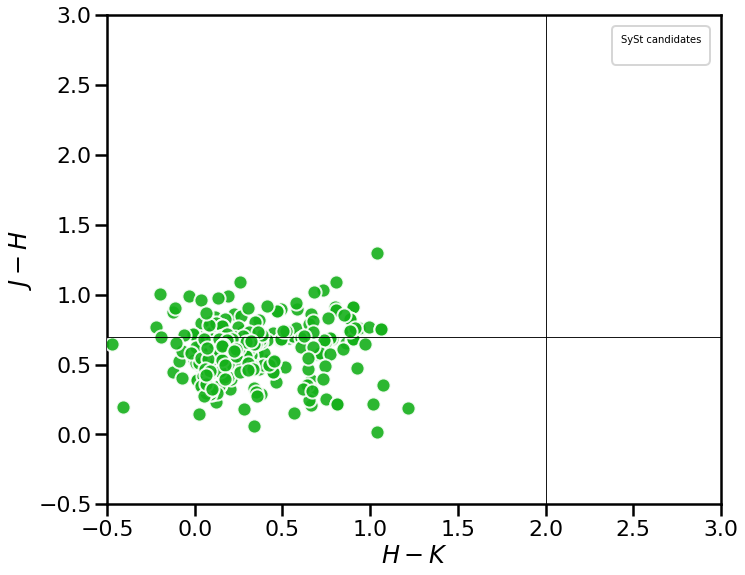

In [20]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.legend(ncol=2).set_title(r"SySt candidates")
ax.set(xlim=[-0.5, 3.0], ylim=[-0.5, 3.0])
#ax.set_aspect("equal")
ax.set(xlabel=r"$H - K$", ylabel=r"$J - H$")
ax.scatter(H_K, J_H,  c=sn.xkcd_rgb['green'], 
                  alpha=0.9, marker='o', s=200, zorder=3, edgecolor='w', cmap="Blues")
#ax.plot(x, y, c="k", lw=0.9)
ax.axhline(y=0.7, c="k", lw=0.9, zorder=3.1)
ax.axvline(x=2., c="k", lw=0.9, zorder=3.1)
#ax.axvline(x=7.87, c="k", lw=0.9)
textbb = {"facecolor": "orange", "alpha": 0.7, "edgecolor": "none"}
textpars = {'ha': 'center', 'va': 'center', 'bbox': textbb, 'fontsize': 'small'}
#ax.text(12, -0.19, r'PN zone', rotation=0, rotation_mode='anchor', **textpars)

In [16]:
#masking
m = tab["Jmag"] - tab["Hmag"] >= 0.7

In [27]:
tab[m]

index,Field,ID,RA,DEC,X,Y,ISOarea,MU_MAX,A,B,THETA,ELONGATION,ELLIPTICITY,FLUX_RADIUS,KRON_RADIUS,PhotoFlagDet,CLASS_STAR,FWHM,FWHM_n,s2nDet,PhotoFlag_U,CLASS_STAR_U,FWHM_U,PhotoFlag_F378,CLASS_STAR_F378,FWHM_F378,PhotoFlag_F395,CLASS_STAR_F395,FWHM_F395,PhotoFlag_F410,CLASS_STAR_F410,FWHM_F410,PhotoFlag_F430,CLASS_STAR_F430,FWHM_F430,PhotoFlag_G,CLASS_STAR_G,FWHM_G,PhotoFlag_F515,CLASS_STAR_F515,FWHM_F515,PhotoFlag_R,CLASS_STAR_R,FWHM_R,PhotoFlag_F660,CLASS_STAR_F660,FWHM_F660,PhotoFlag_I,CLASS_STAR_I,FWHM_I,PhotoFlag_F861,CLASS_STAR_F861,FWHM_F861,PhotoFlag_Z,CLASS_STAR_Z,FWHM_Z,U_auto,e_U_auto,s2n_U_auto,F378_auto,e_F378_auto,s2n_F378_auto,F395_auto,e_F395_auto,s2n_F395_auto,F410_auto,e_F410_auto,s2n_F410_auto,F430_auto,e_F430_auto,s2n_F430_auto,G_auto,e_G_auto,s2n_G_auto,F515_auto,e_F515_auto,s2n_F515_auto,R_auto,e_R_auto,s2n_R_auto,F660_auto,e_F660_auto,s2n_F660_auto,I_auto,e_I_auto,s2n_I_auto,F861_auto,e_F861_auto,s2n_F861_auto,Z_auto,e_Z_auto,s2n_Z_auto,nDet_auto,U_petro,e_U_petro,s2n_U_petro,F378_petro,e_F378_petro,s2n_F378_petro,F395_petro,e_F395_petro,s2n_F395_petro,F410_petro,e_F410_petro,s2n_F410_petro,F430_petro,e_F430_petro,s2n_F430_petro,G_petro,e_G_petro,s2n_G_petro,F515_petro,e_F515_petro,s2n_F515_petro,R_petro,e_R_petro,s2n_R_petro,F660_petro,e_F660_petro,s2n_F660_petro,I_petro,e_I_petro,s2n_I_petro,F861_petro,e_F861_petro,s2n_F861_petro,Z_petro,e_Z_petro,s2n_Z_petro,nDet_petro,U_iso,e_U_iso,s2n_U_iso,F378_iso,e_F378_iso,s2n_F378_iso,F395_iso,e_F395_iso,s2n_F395_iso,F410_iso,e_F410_iso,s2n_F410_iso,F430_iso,e_F430_iso,s2n_F430_iso,G_iso,e_G_iso,s2n_G_iso,F515_iso,e_F515_iso,s2n_F515_iso,R_iso,e_R_iso,s2n_R_iso,F660_iso,e_F660_iso,s2n_F660_iso,I_iso,e_I_iso,s2n_I_iso,F861_iso,e_F861_iso,s2n_F861_iso,Z_iso,e_Z_iso,s2n_Z_iso,nDet_iso,U_aper_3,e_U_aper_3,s2n_U_aper_3,F378_aper_3,e_F378_aper_3,s2n_F378_aper_3,F395_aper_3,e_F395_aper_3,s2n_F395_aper_3,F410_aper_3,e_F410_aper_3,s2n_F410_aper_3,F430_aper_3,e_F430_aper_3,s2n_F430_aper_3,G_aper_3,e_G_aper_3,s2n_G_aper_3,F515_aper_3,e_F515_aper_3,s2n_F515_aper_3,R_aper_3,e_R_aper_3,s2n_R_aper_3,F660_aper_3,e_F660_aper_3,s2n_F660_aper_3,I_aper_3,e_I_aper_3,s2n_I_aper_3,F861_aper_3,e_F861_aper_3,s2n_F861_aper_3,Z_aper_3,e_Z_aper_3,s2n_Z_aper_3,nDet_aper_3,U_aper_6,e_U_aper_6,s2n_U_aper_6,F378_aper_6,e_F378_aper_6,s2n_F378_aper_6,F395_aper_6,e_F395_aper_6,s2n_F395_aper_6,F410_aper_6,e_F410_aper_6,s2n_F410_aper_6,F430_aper_6,e_F430_aper_6,s2n_F430_aper_6,G_aper_6,e_G_aper_6,s2n_G_aper_6,F515_aper_6,e_F515_aper_6,s2n_F515_aper_6,R_aper_6,e_R_aper_6,s2n_R_aper_6,F660_aper_6,e_F660_aper_6,s2n_F660_aper_6,I_aper_6,e_I_aper_6,s2n_I_aper_6,F861_aper_6,e_F861_aper_6,s2n_F861_aper_6,Z_aper_6,e_Z_aper_6,s2n_Z_aper_6,nDet_aper_6,U_PStotal,e_U_PStotal,s2n_U_PStotal,F378_PStotal,e_F378_PStotal,s2n_F378_PStotal,F395_PStotal,e_F395_PStotal,s2n_F395_PStotal,F410_PStotal,e_F410_PStotal,s2n_F410_PStotal,F430_PStotal,e_F430_PStotal,s2n_F430_PStotal,G_PStotal,e_G_PStotal,s2n_G_PStotal,F515_PStotal,e_F515_PStotal,s2n_F515_PStotal,R_PStotal,e_R_PStotal,s2n_R_PStotal,F660_PStotal,e_F660_PStotal,s2n_F660_PStotal,I_PStotal,e_I_PStotal,s2n_I_PStotal,F861_PStotal,e_F861_PStotal,s2n_F861_PStotal,Z_PStotal,e_Z_PStotal,s2n_Z_PStotal,nDet_magPStotal,P(PN),P(SySt),P(all_else),AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID_x,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
int64,str12,str24,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str47,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [29]:
# Save the table result WISE
asciifile_crit_2mass = "../DR3-SPLUS/Allwise_SySt-pc-halphaemitter-allmain-99-prob_2mass_cri07.dat" 
tab[m].write(asciifile_crit_2mass, format="ascii.commented_header")  

# Now HYDRA

In [23]:
tab1 = Table.read(ROOT_PATH / "DR3-SPLUS/HYDRA/Allwise_SySt-pc-HalphaEmit_hydra_3error_pstotal-99-prob.dat", format="ascii")

In [24]:
#Defining the colours
H_K1 = tab1["Hmag"] - tab1["Kmag"]
J_H1 = tab1["Jmag"] - tab1["Hmag"]

No handles with labels found to put in legend.


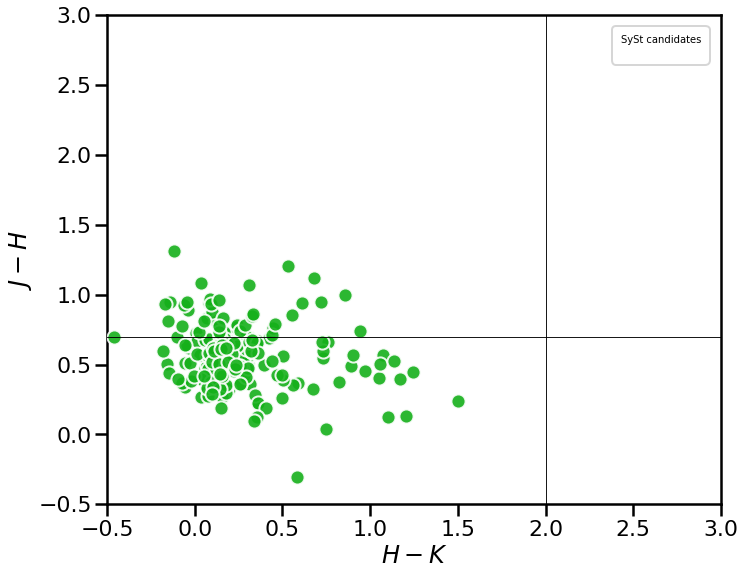

In [25]:
fig1, ax1 = plt.subplots(figsize=(11, 9))
ax1.legend(ncol=2).set_title(r"SySt candidates")
ax1.set(xlim=[-0.5, 3.0], ylim=[-0.5, 3.0])
#ax.set_aspect("equal")
ax1.set(xlabel=r"$H - K$", ylabel=r"$J - H$")
ax1.scatter(H_K1, J_H1,  c=sn.xkcd_rgb['green'], 
                  alpha=0.9, marker='o', s=200, zorder=3, edgecolor='w', cmap="Blues")
#ax.plot(x, y, c="k", lw=0.9)
ax1.axhline(y=0.7, c="k", lw=0.9, zorder=3.1)
ax1.axvline(x=2., c="k", lw=0.9, zorder=3.1)
#ax.axvline(x=7.87, c="k", lw=0.9)
textbb = {"facecolor": "orange", "alpha": 0.7, "edgecolor": "none"}
textpars = {'ha': 'center', 'va': 'center', 'bbox': textbb, 'fontsize': 'small'}
#ax.text(12, -0.19, r'PN zone', rotation=0, rotation_mode='anchor', **textpars)

In [26]:
#masking
m1 = tab1["Jmag"] - tab1["Hmag"] >= 0.7
tab1[m1]

Field,ID,RA,DEC,X,Y,ISOarea,MU_MAX,A,B,THETA,ELONGATION,ELLIPTICITY,FLUX_RADIUS,KRON_RADIUS,PhotoFlagDet,CLASS_STAR,FWHM,s2n_Det_auto,s2n_Det_petro,s2n_Det_iso,s2n_Det_aper_3,s2n_Det_aper_6,FWHM_n,PhotoFlag_U,CLASS_STAR_U,FWHM_U,PhotoFlag_F378,CLASS_STAR_F378,FWHM_F378,PhotoFlag_F395,CLASS_STAR_F395,FWHM_F395,PhotoFlag_F410,CLASS_STAR_F410,FWHM_F410,PhotoFlag_F430,CLASS_STAR_F430,FWHM_F430,PhotoFlag_G,CLASS_STAR_G,FWHM_G,PhotoFlag_F515,CLASS_STAR_F515,FWHM_F515,PhotoFlag_R,CLASS_STAR_R,FWHM_R,PhotoFlag_F660,CLASS_STAR_F660,FWHM_F660,PhotoFlag_I,CLASS_STAR_I,FWHM_I,PhotoFlag_F861,CLASS_STAR_F861,FWHM_F861,PhotoFlag_Z,CLASS_STAR_Z,FWHM_Z,U_auto,e_U_auto,s2n_U_auto,F378_auto,e_F378_auto,s2n_F378_auto,F395_auto,e_F395_auto,s2n_F395_auto,F410_auto,e_F410_auto,s2n_F410_auto,F430_auto,e_F430_auto,s2n_F430_auto,G_auto,e_G_auto,s2n_G_auto,F515_auto,e_F515_auto,s2n_F515_auto,R_auto,e_R_auto,s2n_R_auto,F660_auto,e_F660_auto,s2n_F660_auto,I_auto,e_I_auto,s2n_I_auto,F861_auto,e_F861_auto,s2n_F861_auto,Z_auto,e_Z_auto,s2n_Z_auto,nDet_auto,U_petro,e_U_petro,s2n_U_petro,F378_petro,e_F378_petro,s2n_F378_petro,F395_petro,e_F395_petro,s2n_F395_petro,F410_petro,e_F410_petro,s2n_F410_petro,F430_petro,e_F430_petro,s2n_F430_petro,G_petro,e_G_petro,s2n_G_petro,F515_petro,e_F515_petro,s2n_F515_petro,R_petro,e_R_petro,s2n_R_petro,F660_petro,e_F660_petro,s2n_F660_petro,I_petro,e_I_petro,s2n_I_petro,F861_petro,e_F861_petro,s2n_F861_petro,Z_petro,e_Z_petro,s2n_Z_petro,nDet_petro,U_iso,e_U_iso,s2n_U_iso,F378_iso,e_F378_iso,s2n_F378_iso,F395_iso,e_F395_iso,s2n_F395_iso,F410_iso,e_F410_iso,s2n_F410_iso,F430_iso,e_F430_iso,s2n_F430_iso,G_iso,e_G_iso,s2n_G_iso,F515_iso,e_F515_iso,s2n_F515_iso,R_iso,e_R_iso,s2n_R_iso,F660_iso,e_F660_iso,s2n_F660_iso,I_iso,e_I_iso,s2n_I_iso,F861_iso,e_F861_iso,s2n_F861_iso,Z_iso,e_Z_iso,s2n_Z_iso,nDet_iso,U_aper_3,e_U_aper_3,s2n_U_aper_3,F378_aper_3,e_F378_aper_3,s2n_F378_aper_3,F395_aper_3,e_F395_aper_3,s2n_F395_aper_3,F410_aper_3,e_F410_aper_3,s2n_F410_aper_3,F430_aper_3,e_F430_aper_3,s2n_F430_aper_3,G_aper_3,e_G_aper_3,s2n_G_aper_3,F515_aper_3,e_F515_aper_3,s2n_F515_aper_3,R_aper_3,e_R_aper_3,s2n_R_aper_3,F660_aper_3,e_F660_aper_3,s2n_F660_aper_3,I_aper_3,e_I_aper_3,s2n_I_aper_3,F861_aper_3,e_F861_aper_3,s2n_F861_aper_3,Z_aper_3,e_Z_aper_3,s2n_Z_aper_3,nDet_aper_3,U_aper_6,e_U_aper_6,s2n_U_aper_6,F378_aper_6,e_F378_aper_6,s2n_F378_aper_6,F395_aper_6,e_F395_aper_6,s2n_F395_aper_6,F410_aper_6,e_F410_aper_6,s2n_F410_aper_6,F430_aper_6,e_F430_aper_6,s2n_F430_aper_6,G_aper_6,e_G_aper_6,s2n_G_aper_6,F515_aper_6,e_F515_aper_6,s2n_F515_aper_6,R_aper_6,e_R_aper_6,s2n_R_aper_6,F660_aper_6,e_F660_aper_6,s2n_F660_aper_6,I_aper_6,e_I_aper_6,s2n_I_aper_6,F861_aper_6,e_F861_aper_6,s2n_F861_aper_6,Z_aper_6,e_Z_aper_6,s2n_Z_aper_6,nDet_aper_6,U_PStotal,e_U_PStotal,s2n_U_PStotal,F378_PStotal,e_F378_PStotal,s2n_F378_PStotal,F395_PStotal,e_F395_PStotal,s2n_F395_PStotal,F410_PStotal,e_F410_PStotal,s2n_F410_PStotal,F430_PStotal,e_F430_PStotal,s2n_F430_PStotal,G_PStotal,e_G_PStotal,s2n_G_PStotal,F515_PStotal,e_F515_PStotal,s2n_F515_PStotal,R_PStotal,e_R_PStotal,s2n_R_PStotal,F660_PStotal,e_F660_PStotal,s2n_F660_PStotal,I_PStotal,e_I_PStotal,s2n_I_PStotal,F861_PStotal,e_F861_PStotal,s2n_F861_PStotal,Z_PStotal,e_Z_PStotal,s2n_Z_PStotal,nDet_magPStotal,P(PN),P(SySt),P(all_else),AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID_x,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
str12,str24,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str50,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,flo

In [30]:
# Save the table result WISE
asciifile_crit_2mass_hydra = "../DR3-SPLUS/HYDRA/Allwise_SySt-pc-HalphaEmit_hydra_3error_pstotal-99-prob_2mass_cri07.dat" 
tab1[m1].write(asciifile_crit_2mass_hydra, format="ascii.commented_header")  